In [3]:
import torch

def load_learned_embed_in_clip(learned_embeds_path, text_encoder, tokenizer):
    loaded_learned_embeds = torch.load(learned_embeds_path, map_location="cpu")

    # separate token and the embeds
    token = list(loaded_learned_embeds.keys())[0]
    embeds = loaded_learned_embeds[token]

    # cast to dtype of text_encoder
    dtype = text_encoder.get_input_embeddings().weight.dtype
    embeds = embeds.to(dtype)

    # add the token in tokenizer
    num_added_tokens = tokenizer.add_tokens(token)
    if num_added_tokens == 0:
        print(f"Warning: Token {token} already exists! Will replace this token in-memory!")

    # resize the token embeddings
    text_encoder.resize_token_embeddings(len(tokenizer))

    # get the id for the token and assign the embeds
    token_id = tokenizer.convert_tokens_to_ids(token)
    text_encoder.get_input_embeddings().weight.data[token_id] = embeds

In [10]:
!leap_textual_inversion --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1-base --placeholder_token="<avi>" --train_data_dir=train_images/avi --learning_rate=0.001 --leap_model_path=weights/leap_ti_2.0_sd2.1_beta.ckpt --max_train_steps 100

/home/slv/anaconda3/envs/leap/bin/leap_textual_inversion:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('leap-sd==0.0.2')
2023-08-21 06:36:14.339718: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-21 06:36:14.362645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 06:36:14.665942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
08/21/2023 06:36:15 - INFO

2023-08-21 06:41:39.478253: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-21 06:41:39.503412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 06:41:39.862260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

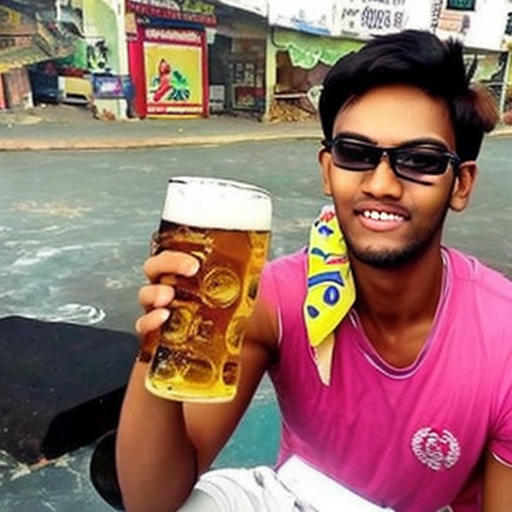

In [ ]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base"      
)
# If GPU
pipeline = pipeline.to('cuda')
embed_path = "text-inversion-model/learned_embeds.bin"
load_learned_embed_in_clip(embed_path, pipeline.text_encoder, pipeline.tokenizer)
torch.manual_seed(80085)
preview = pipeline(f"<avi> drinking beer", width = 512, height = 512, guidance_scale=9, num_inference_steps=25).images[0]
preview

  0%|          | 0/25 [00:00<?, ?it/s]

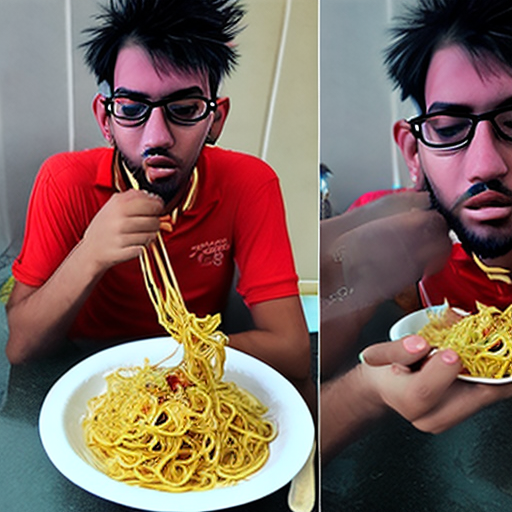

In [10]:
preview = pipeline(f"<avi> eating spagetti", width = 512, height = 512, guidance_scale=9, num_inference_steps=25).images[0]
preview

  0%|          | 0/25 [00:00<?, ?it/s]

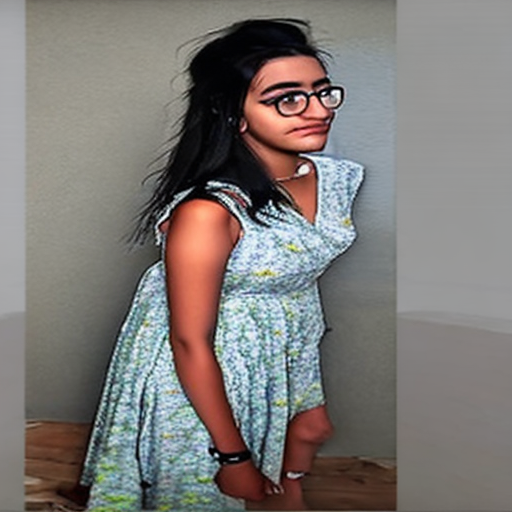

In [9]:
preview = pipeline(f"<avi> wearing a frock", width = 512, height = 512, guidance_scale=9, num_inference_steps=25).images[0]
preview

  0%|          | 0/500 [00:00<?, ?it/s]

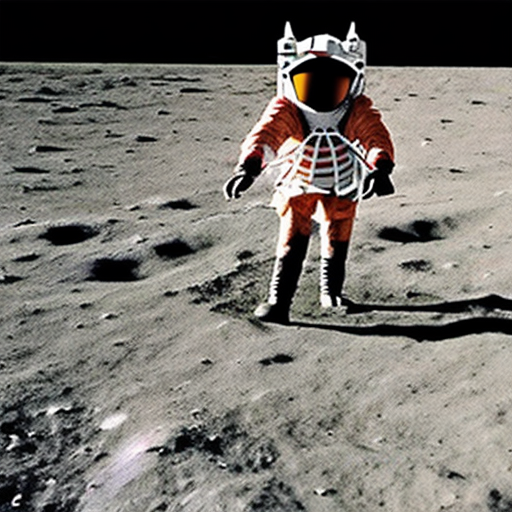

In [13]:
preview = pipeline(f"<avi> on a horse on the moon", width = 512, height = 512, guidance_scale=9, num_inference_steps=500).images[0]
preview

In [3]:
!leap_textual_inversion --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1-base --placeholder_token="<avi>" --train_data_dir=train_images/avi --learning_rate=0.001 --leap_model_path=weights/leap_ti_2.0_sd2.1_beta.ckpt --max_train_steps 500

/home/slv/anaconda3/envs/leap/bin/leap_textual_inversion:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('leap-sd==0.0.2')
2023-08-21 06:52:44.856927: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-21 06:52:44.880427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 06:52:45.185023: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
08/21/2023 06:52:46 - INFO

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

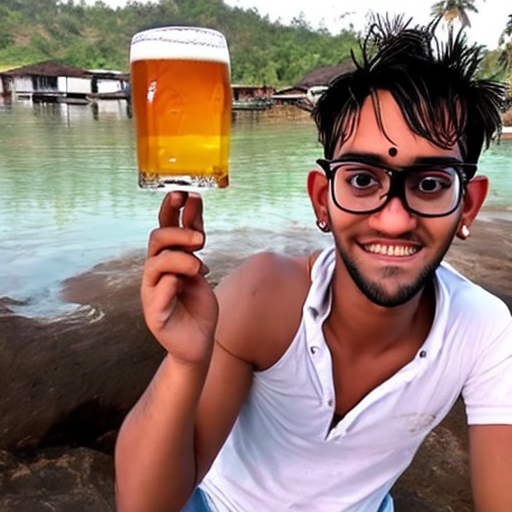

In [12]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base"      
)
# If GPU
pipeline = pipeline.to('cuda')
embed_path = "text-inversion-model/learned_embeds.bin"
load_learned_embed_in_clip(embed_path, pipeline.text_encoder, pipeline.tokenizer)
torch.manual_seed(80085)
preview = pipeline(f"<avi> drinking beer", width = 512, height = 512, guidance_scale=9, num_inference_steps=500).images[0]
preview

  0%|          | 0/300 [00:00<?, ?it/s]

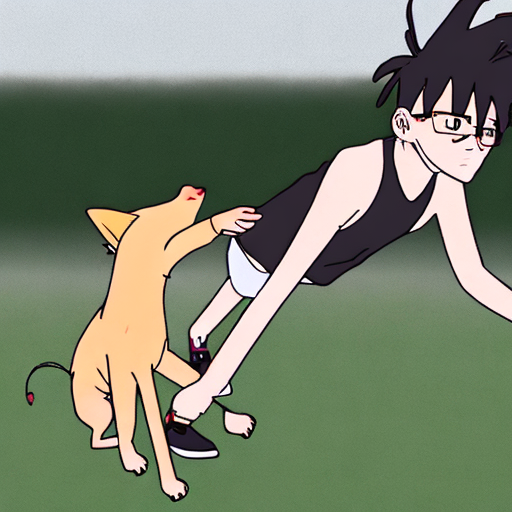

In [21]:
preview = pipeline(f"<avi> running away from a dog. anime style ", width = 512, height = 512, guidance_scale=9, num_inference_steps=300).images[0]
preview

In [22]:
!leap_textual_inversion --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1-base --placeholder_token="<ramsel>" --train_data_dir=train_images/ramsel --learning_rate=0.001 --leap_model_path=weights/leap_ti_2.0_sd2.1_beta.ckpt --max_train_steps 500

/home/slv/anaconda3/envs/leap/bin/leap_textual_inversion:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('leap-sd==0.0.2')
2023-08-21 07:46:53.980694: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
08/21/2023 07:46:55 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

{'thresholding', 'variance_type', 'dynamic_thresholding_ratio', 'sample_max_value', 'timestep_spacing', 'clip_sample_range'} was not found in config. Values will be initialized to default values.
{'scaling_factor', 'force_upcast'} was not found in config. Values will be initialized to default values.
{'transformer_layers_per_block', 'upcast_attention', 'mid_block_type', 'resnet_skip_time_act', 'addition_embed_type_num_heads', 'conv_out_kernel', 'cross_attention_norm', 'ti

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

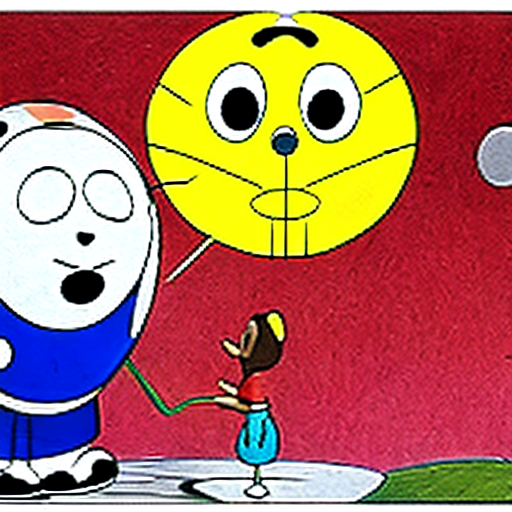

In [29]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base"      
)
# If GPU
pipeline = pipeline.to('cuda')
embed_path = "text-inversion-model/learned_embeds.bin"
load_learned_embed_in_clip(embed_path, pipeline.text_encoder, pipeline.tokenizer)
torch.manual_seed(80085)
preview = pipeline(f"<ramsel> walking on the moon ", width = 512, height = 512, guidance_scale=9, num_inference_steps=100).images[0]
preview

In [1]:
!leap_textual_inversion --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1-base --placeholder_token="<maan>" --train_data_dir=train_images/maan --learning_rate=0.001 --leap_model_path=weights/leap_ti_2.0_sd2.1_beta.ckpt --max_train_steps 300

/home/slv/anaconda3/envs/leap/bin/leap_textual_inversion:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('leap-sd==0.0.2')
2023-08-21 08:12:44.740201: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-21 08:12:44.763605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 08:12:45.073631: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
08/21/2023 08:12:46 - INFO

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

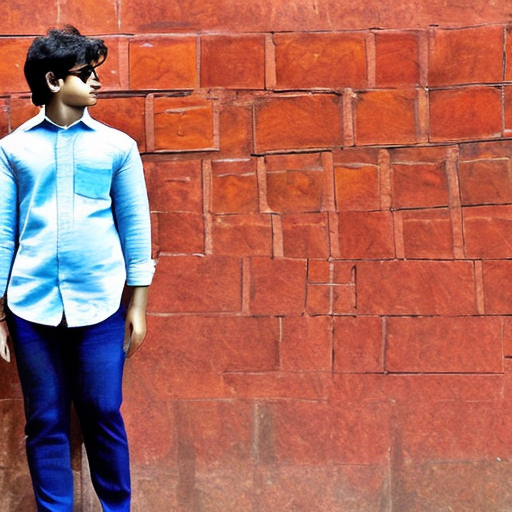

In [5]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base"      
)
# If GPU
pipeline = pipeline.to('cuda')
embed_path = "text-inversion-model/learned_embeds.bin"
load_learned_embed_in_clip(embed_path, pipeline.text_encoder, pipeline.tokenizer)
torch.manual_seed(80085)
preview = pipeline(f"<maan> standing on a wall", width = 512, height = 512, guidance_scale=9, num_inference_steps=100).images[0]
preview

  0%|          | 0/100 [00:00<?, ?it/s]

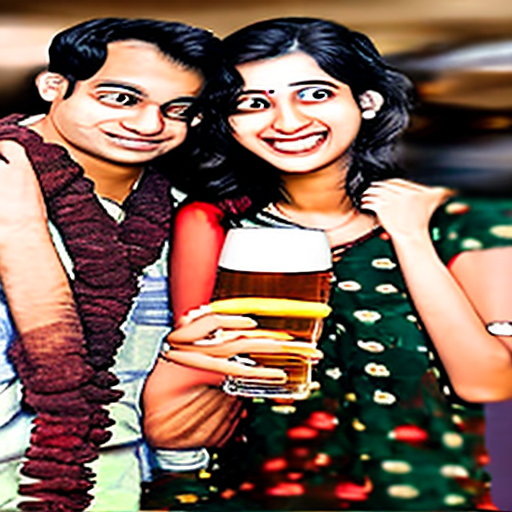

In [10]:
preview = pipeline(f"<maan> drinking beer", width = 512, height = 512, guidance_scale=9, num_inference_steps=100).images[0]
preview

  0%|          | 0/100 [00:00<?, ?it/s]

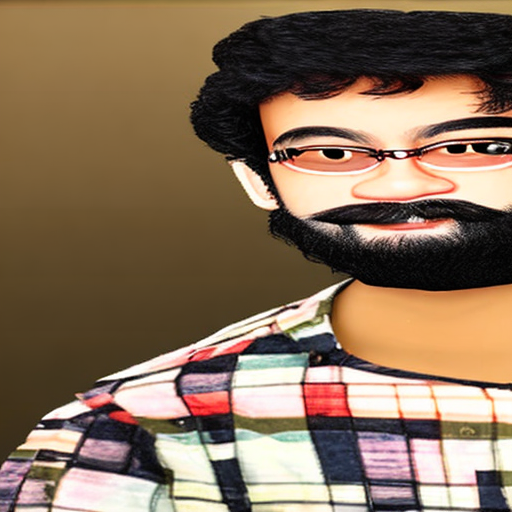

In [7]:
preview = pipeline(f"<maan> with a beard", width = 512, height = 512, guidance_scale=9, num_inference_steps=100).images[0]
preview